In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Constructing confidence intervals via central limit theorem

In [2]:
# From PTSD paper, there were 52 test cases, 42 of which were correct

n = 52
c = 42

# Create array of zeros, size n
rawdata = np.zeros(n)

# Set first c elements to 1
rawdata[range(c)] = 1

# Create pandas data frame
data = pd.DataFrame({"Match": rawdata})

In [3]:
## Using central limit theorem, compute confidence interval
stderr = np.std(data.Match,ddof=1)/np.sqrt(52)
print("Stderr:", stderr)

# Area under a standard normal from -1.96 to 1.96 is about 95%
critval = 1.96 
norm_ci = [data.Match.mean() - critval*stderr,
          data.Match.mean() + critval*stderr]

print("Norm ci:",norm_ci)

Stderr: 0.055186927229187645
Norm ci: [0.6995259303231, 0.9158586850615155]


# 2. Constructing confidence intervals via bootstrap

In [4]:
# Compute 10000 bootstrap datasets, compute means in each
def createBootstrapMeans(data):
    numboot = 10000
    n = len(data)
    boot_means = np.zeros(numboot)
    np.random.seed(0)
    for i in range(numboot):
        d = data.sample(n,replace=True)
        boot_means[i] = d.mean()
    return boot_means


c:\users\owner\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

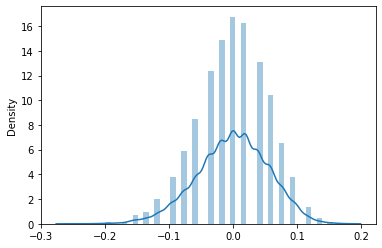

In [5]:
# Plot histogram
bm = createBootstrapMeans(data)-data.Match.mean()
sns.distplot(bm)

In [6]:
# Compute quantiles 
boot_quant = np.quantile(bm,[0.025,0.975])
print(boot_quant)

[-0.11538462  0.09615385]


In [7]:
#Compute confidence interval
boot_ci = [data.Match.mean() - boot_quant[1],
          data.Match.mean() - boot_quant[0]]
print("Boot CI:",boot_ci)
print("Norm CI:",norm_ci)


Boot CI: [0.7115384615384616, 0.9230769230769231]
Norm CI: [0.6995259303231, 0.9158586850615155]
